In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import seaborn as sns
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM
from pandas_datareader import data as pdr
import yfinance as yf
plt.style.use('fivethirtyeight')

In [ ]:
#!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 6.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=b0d46069ce2de64e9afb27ba85878af4c0cc77f11ccfdcd9142cfe199c4f54ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-ryh01la1/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#Get the dataset
# start = datetime.datetime(2004,1,1)
# end=datetime.datetime.now()
yf.pdr_override()
df = pdr.get_data_yahoo('TTM',start="2004-01-01", end="2021-04-09")
#df=web.DataReader()
df = df.reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-27,9.150000,9.280000,9.050000,9.150000,7.752062,379700
1,2004-09-28,8.850000,8.850000,8.650000,8.760000,7.421647,332700
2,2004-09-29,8.760000,8.780000,8.660000,8.750000,7.413176,119800
3,2004-09-30,8.890000,8.970000,8.890000,8.970000,7.599563,166400
4,2004-10-01,9.140000,9.340000,9.120000,9.250000,7.836785,266600
...,...,...,...,...,...,...,...
4157,2021-04-01,21.040001,21.180000,20.870001,21.030001,21.030001,619900
4158,2021-04-05,21.030001,21.139999,20.680000,20.930000,20.930000,1627400
4159,2021-04-06,20.549999,20.950001,20.549999,20.840000,20.840000,1123000
4160,2021-04-07,20.690001,20.709999,20.350000,20.450001,20.450001,844800


In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df=df.set_index('Date')

In [ ]:
#datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4162 entries, 2004-09-27 to 2021-04-08
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        4162 non-null   float64
 1   High        4162 non-null   float64
 2   Low         4162 non-null   float64
 3   Close       4162 non-null   float64
 4   Adj Close   4162 non-null   float64
 5   Volume      4162 non-null   int64  
 6   Prediction  4132 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 260.1 KB


In [ ]:
#Descriptive Statistics of dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Prediction
count,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4.162000e+03,4132.000000
mean,21.488429,21.713176,21.231663,21.479445,20.826337,1.430128e+06,20.921188
std,10.596531,10.674389,10.520366,10.593462,10.849781,9.548054e+05,10.831617
min,3.170000,3.410000,3.050000,3.140000,2.907577,0.000000e+00,2.907577
25%,12.372500,12.500000,12.192500,12.370000,12.087623,8.160250e+05,12.210000
50%,19.515000,19.740000,19.255000,19.495000,18.078370,1.245000e+06,18.166908
75%,28.629999,28.920000,28.302500,28.667500,28.297444,1.851000e+06,28.381273
max,51.259998,51.799999,50.650002,51.470001,51.448509,1.085910e+07,51.448509


(4132, 6)


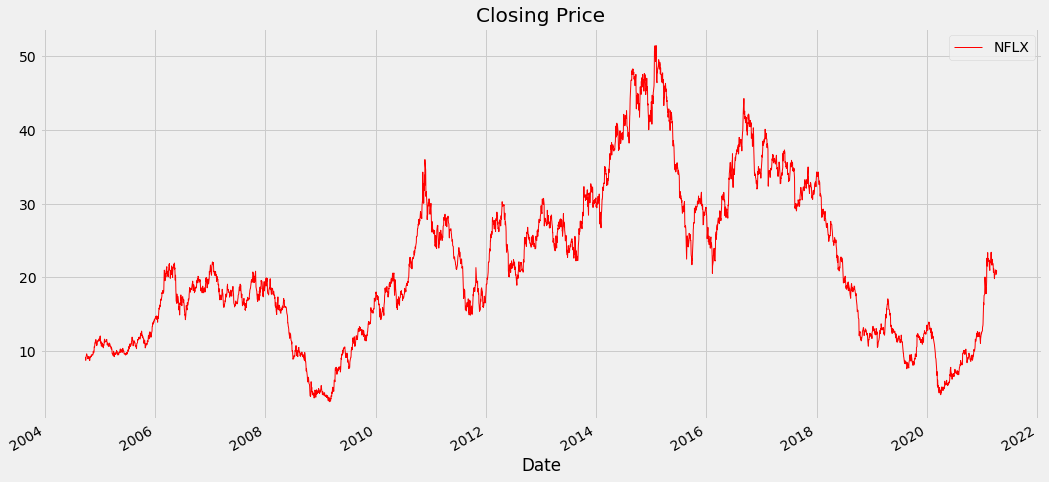

In [ ]:
#Visualize Data
from matplotlib import style 
df['Close'].plot(label='NFLX',figsize=(16,8),title='Closing Price',color='red',linewidth=1.0, grid=True)
plt.style.use('fivethirtyeight')
plt.legend()
predict_days = 30
df['Prediction'] = df['Adj Close'].shift(-predict_days)
df.head()
X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
#print(x)
print(X.shape)

In [ ]:
y = np.array(df['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(4132,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 60% for training & 40% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 
linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)
y_predict=linear_model.predict(X_test)
X_predict = np.array(df.drop(['Prediction'], 1))[-predict_days:]
#print(X_predict)
print(X_predict.shape)
linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))

(3305, 6)
(3305,)
(827, 6)
(827,)
Linear Model score: 0.902760805164151
(30, 6)


2021-04-08 00:00:00


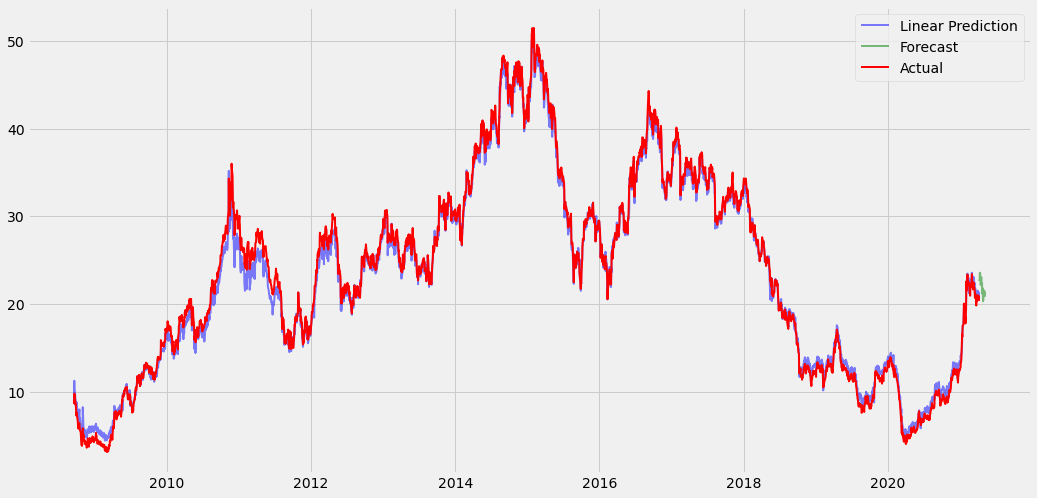

In [ ]:
from datetime import datetime,timedelta
predicted_dates = []
recent_date = df.index.max()
print(recent_date)
display_at = 1000
alpha = 0.5
for i in range(predict_days):
    recent_date += (timedelta(days=1))
    predicted_dates.append(recent_date)
plt.figure(figsize=(16, 8))
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha,linewidth=2)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha,linewidth=2)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red',linewidth=2)
plt.style.use('fivethirtyeight')
plt.legend()

In [ ]:
from sklearn import metrics
import math
print(metrics.mean_absolute_error(y_test,y_predict))
print(metrics.mean_squared_error(y_test,y_predict))
print(math.sqrt(metrics.mean_squared_error(y_test,y_predict)))
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_predict)))

2.5612384631023226
10.774637259126116
3.2824742587149283
R2 Score value: 0.9028
